In [2]:
import pycaret
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
# visualization libraries
import seaborn as sns
from fbprophet import Prophet

In [28]:
median=pd.read_csv('medianSalesPrice2.csv', dtype={"Bedrooms": "string"})

In [27]:
median= median.loc[median['RegionName'] == '33178']
median=median.drop(columns=['RegionID','SizeRank','RegionType','StateName','State','Metro','City','CountyName','RegionName'])


KeyError: 'RegionName'

In [29]:
median.dtypes

Bedrooms    string
Values      object
Total        int64
dtype: object

In [30]:
median = median.fillna(0)

In [31]:
null_columns=median.columns[median.isnull().any()]
median[null_columns].isnull().sum()

Series([], dtype: float64)

In [32]:
#medianMelt= pd.melt(median, id_vars=['Bedrooms'])

In [33]:
median.rename(columns = {'Values': 'date'}, inplace = True)

In [34]:
median['date']=pd.to_datetime(median['date'])

In [35]:
# medianMelt2=medianMelt.drop(columns=['CountyName','date'])
median=median.drop(columns=['date'])

In [36]:
median

Bedrooms   Total
0          1  219321
1          1  219223
2          1  219191
3          1  218721
4          1  217711
..       ...     ...
360        5  701111
361        5  703419
362        5  706214
363        5  709939
364        5  714459

[365 rows x 2 columns]

In [37]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from pycaret.classification import compare_models, create_model,plot_model, predict_model

In [38]:
#median = median.loc[median['date'] >= '2020-01-31']

In [39]:
#medianMelt2=medianMelt2[['Bedrooms','City','value']]

In [40]:
# medianMelt2=medianMelt2.reset_index(drop=True)
# medianMelt2

In [16]:
medianMelt['Bedrooms'].value_counts()

5    73
4    73
3    73
2    73
1    73
Name: Bedrooms, dtype: int64

In [41]:
grid = setup(data=median, target=median.columns[-1], html=True, silent=False, verbose=True) #

In [46]:
compare_models(include=['lr','nb'])

[]

In [45]:
compare_models(n_select=10)

[]

In [44]:
clf1 = setup(data = median, 
             target = 'Total',
             numeric_imputation = 'mean',
             #categorical_features = ['Bedrooms'], 
             ignore_features = ['Bedrooms'],
             silent = True)


array([[<AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'value'}>]], dtype=object)

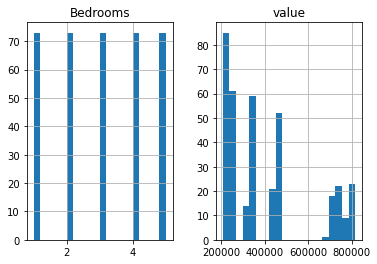

In [23]:
median.hist(bins=20)

<AxesSubplot:>

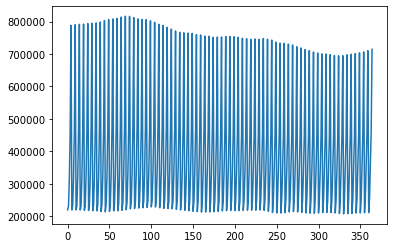

In [24]:
medianMelt.value.plot()

In [26]:
import os

In [27]:
os.environ

environ{'ACLOCAL_PATH': 'C:\\Program Files\\Git\\mingw64\\share\\aclocal;C:\\Program Files\\Git\\usr\\share\\aclocal',
        'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\betan\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-N71JR62',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'PythonTime',
        'CONDA_EXE': 'C:/users/betan/anaconda3/Scripts/conda.exe',
        'CONDA_PREFIX': 'C:\\users\\betan\\anaconda3\\envs\\PythonTime',
        'CONDA_PROMPT_MODIFIER': '(PythonTime) ',
        'CONDA_PYTHON_EXE': 'C:/users/betan/anaconda3/python.exe',
        'CONDA_SHLVL': '1',
        'CONFIG_SITE': 'C:/Program Files/Git/mingw64/etc/config.site',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'DISPLAY': 'needs-to-be-defined',
        'DRIVERDATA': 'C:\\Windows\

In [28]:
!which python

/c/users/betan/anaconda3/envs/PythonTime/python


In [29]:
!python --version

Python 3.7.9
